In [1]:
import pandas as pd

df_partidos = pd.read_csv("../partidos_cebollitas_fe82a1a4-e109-41b1-8b78-d9b4341dacaf.csv")
df_partidos_cebollitas = df_partidos[(df_partidos['equipo_local'] == 'Cebollitas FC') | (df_partidos['equipo_visitante'] == 'Cebollitas FC')]
df_partidos_cebollitas.reset_index(drop=True, inplace=True)
df_partidos = df_partidos_cebollitas.copy()
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
2,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML
3,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena
4,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML


In [2]:
# Nueva característica: Diferencia de goles (local - visitante)
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

# Ver resultados
df_partidos[['goles_local', 'goles_visitante', 'diferencia_goles']].head()

,goles_local,goles_visitante,diferencia_goles
0,2,0,2
1,1,0,1
2,5,3,2
3,3,3,0
4,1,2,-1


In [5]:
# Nueva característica: ratio tiros al arco por porcentaje de posesión (local)
df_partidos['ratio_tiros_posesion_local'] = df_partidos['tiros_arco_local'] / (df_partidos['posesion_local (%)'])

# Ver resultados
df_partidos[['tiros_arco_local', 'posesion_local (%)', 'ratio_tiros_posesion_local']].head()

,tiros_arco_local,posesion_local (%),ratio_tiros_posesion_local
0,12,54,0.222222
1,10,55,0.181818
2,7,52,0.134615
3,8,60,0.133333
4,5,56,0.089286


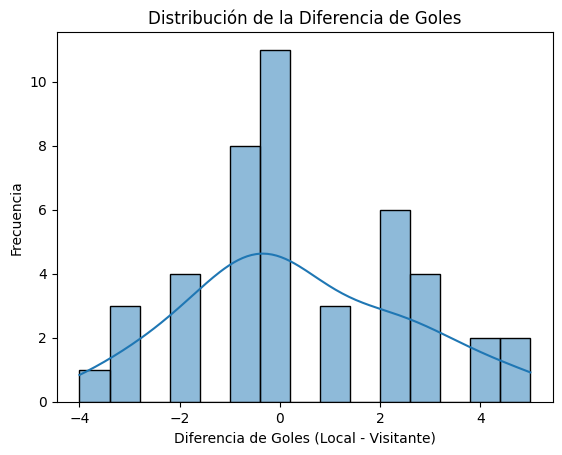

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de diferencia de goles
sns.histplot(df_partidos['diferencia_goles'], bins=15, kde=True)
plt.title('Distribución de la Diferencia de Goles')
plt.xlabel('Diferencia de Goles (Local - Visitante)')
plt.ylabel('Frecuencia')
plt.show()

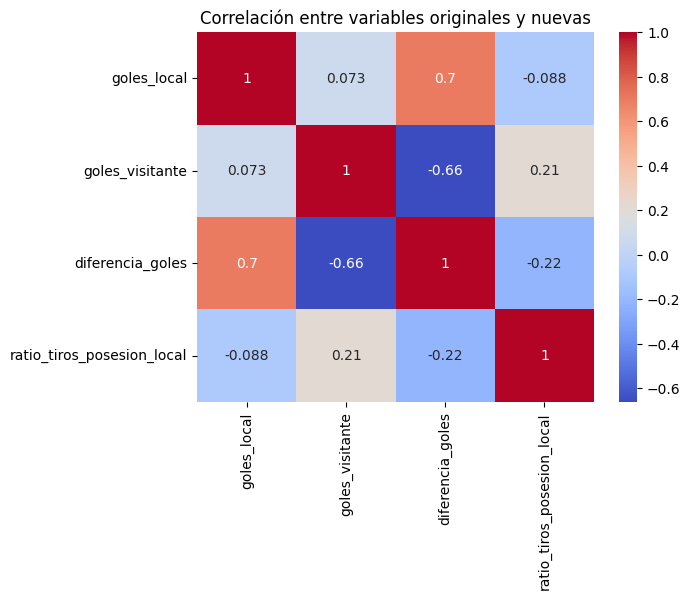

In [7]:
# Analisis de correlaciones
corr_vars = ['goles_local', 'goles_visitante', 'diferencia_goles', 'ratio_tiros_posesion_local']
corr_matrix = df_partidos[corr_vars].corr()

# Mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables originales y nuevas')
plt.show()